In [119]:
#!pip install geopandas
#!pip install matplotlib
#!pip install mapclassify

In [120]:
#import the libraries needed for project
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')
import mapclassify
import numpy as np

In [121]:
#read the csv files into the project. Each one has name for the dataframe it features
gdf=geopandas.read_file('nyc_bb.geojson')
dogs = pd.read_csv('dogs_lic.csv')
income = pd.read_csv('borough_income.csv')

In [122]:
gdf

,boro_code,boro_name,shape_area,shape_leng,geometry
0,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
1,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,2,Bronx,1187174772.32,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
4,4,Queens,3041418003.6,888197.010944,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


<Axes: >

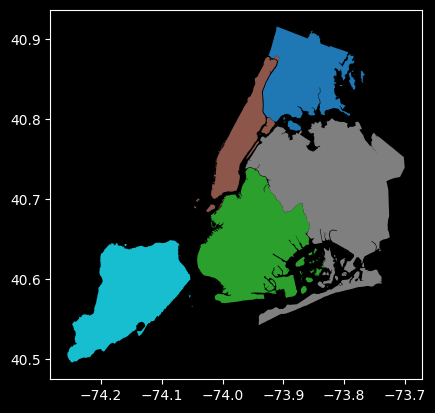

In [123]:
gdf.plot('boro_name')

In [124]:
dogs[['boro_name', 'BreedName', 'X']].groupby(['boro_name', 'BreedName']).count().reset_index().rename(columns={'X':'Count'})

,boro_name,BreedName,Count
0,Bronx,Affenpinscher,2
1,Bronx,Afghan Hound,3
2,Bronx,Airedale Terrier,1
3,Bronx,Akita,18
4,Bronx,Akita Crossbreed,6
...,...,...,...
1216,Staten Island,Whippet,7
1217,Staten Island,Wire Fox Terrier,15
1218,Staten Island,Xoloitzcuintli,1
1219,Staten Island,Yorkshire Terrier,738


In [125]:
dogs_grouped = dogs[['boro_name', 'BreedName', 'X']].groupby(['boro_name', 'BreedName']).size().reset_index(name='count')

In [126]:
#filter out unknown in breedname
dogs_grouped[dogs_grouped['BreedName']!= 'Unknown']

,boro_name,BreedName,count
0,Bronx,Affenpinscher,2
1,Bronx,Afghan Hound,3
2,Bronx,Airedale Terrier,1
3,Bronx,Akita,18
4,Bronx,Akita Crossbreed,6
...,...,...,...
1216,Staten Island,Whippet,7
1217,Staten Island,Wire Fox Terrier,15
1218,Staten Island,Xoloitzcuintli,1
1219,Staten Island,Yorkshire Terrier,738


In [127]:
top_dog = dogs_grouped.groupby('boro_name').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

top_dog

C:\Users\sean8\AppData\Local\Temp\ipykernel_21100\738194143.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_dog = dogs_grouped.groupby('boro_name').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


,boro_name,BreedName,count
0,Bronx,Unknown,1535
1,Bronx,Yorkshire Terrier,1237
2,Bronx,Shih Tzu,1101
3,Brooklyn,Unknown,4143
4,Brooklyn,Yorkshire Terrier,2002
5,Brooklyn,Shih Tzu,1893
6,Manhattan,Unknown,5640
7,Manhattan,Yorkshire Terrier,2087
8,Manhattan,Chihuahua,1922
9,Queens,Unknown,3661


In [128]:
boro_dog = gdf.merge(top_dog, on='boro_name', how='inner')

boro_dog

,boro_code,boro_name,shape_area,shape_leng,geometry,BreedName,count
0,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Unknown,4143
1,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Yorkshire Terrier,2002
2,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Shih Tzu,1893
3,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Unknown,1768
4,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Yorkshire Terrier,738
5,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Shih Tzu,731
6,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Unknown,5640
7,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Yorkshire Terrier,2087
8,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Chihuahua,1922
9,2,Bronx,1187174772.32,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",Unknown,1535


<Axes: >

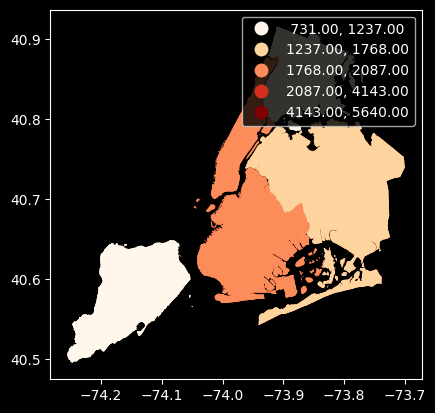

In [129]:
boro_dog.plot('count', legend=True, cmap='OrRd', scheme='natural_breaks')

In [130]:
boro_dog

,boro_code,boro_name,shape_area,shape_leng,geometry,BreedName,count
0,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Unknown,4143
1,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Yorkshire Terrier,2002
2,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Shih Tzu,1893
3,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Unknown,1768
4,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Yorkshire Terrier,738
5,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Shih Tzu,731
6,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Unknown,5640
7,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Yorkshire Terrier,2087
8,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Chihuahua,1922
9,2,Bronx,1187174772.32,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",Unknown,1535


In [131]:
df_inner = pd.merge(dogs, income, on='boro_name', how='inner')

df_inner

,Unnamed: 0,X,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,boro_name,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate,Income
0,1,1,1753,SHADOW,M,01/01/2000 12:00:00 AM,Beagle,Brooklyn,11236,318.0,1014.0,BK50,46.0,8.0,19.0,12/29/2014,01/30/2016,"76,780"
1,2,2,2415,ROCCO,M,10/01/2011 12:00:00 AM,Boxer,Brooklyn,11210,314.0,756.0,BK43,45.0,9.0,17.0,01/07/2015,01/30/2016,"76,780"
2,3,3,3328,LUIGI,M,09/01/2005 12:00:00 AM,Maltese,Bronx,10464,210.0,516.0,BX10,13.0,14.0,34.0,01/17/2015,02/02/2016,"47,260"
3,4,4,7537,PETUNIA,F,08/01/2013 12:00:00 AM,Pug,Brooklyn,11221,304.0,419.0,BK78,34.0,7.0,18.0,03/01/2015,03/28/2016,"76,780"
4,5,5,8487,ROMEO,M,10/01/2008 12:00:00 AM,Maltese,Bronx,10451,201.0,65.0,BX34,17.0,15.0,32.0,03/09/2015,03/09/2016,"47,260"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121857,121928,121945,122225,ROCKY,M,06/01/2014 12:00:00 AM,Boston Terrier,Manhattan,10022,106.0,98.0,MN19,4.0,12.0,28.0,12/31/2016,12/31/2018,"99,530"
121858,121929,121946,122226,ROXY,F,10/01/2007 12:00:00 AM,"Collie, Border",Brooklyn,11219,311.0,250.0,BK28,38.0,10.0,22.0,12/31/2016,09/18/2018,"76,780"
121859,121930,121947,122227,VALENTINA,F,05/01/2016 12:00:00 AM,German Shepherd Crossbreed,Staten Island,10312,503.0,17008.0,SI48,51.0,11.0,24.0,12/31/2016,12/31/2017,"91,632"
121860,121931,121948,122228,VENUS,F,12/01/2010 12:00:00 AM,Yorkshire Terrier,Bronx,10455,201.0,79.0,BX34,8.0,15.0,29.0,12/31/2016,06/06/2017,"47,260"


In [132]:
df_inner.drop(columns = ['Unnamed: 0', 'X', 'ZipCode', 'AnimalName', 'AnimalGender', 'AnimalBirthMonth', 'RowNumber', 'CommunityDistrict', 'CensusTract2010', 'NTA', 'CityCouncilDistrict', 'CongressionalDistrict', 'StateSenatorialDistrict', 'LicenseIssuedDate', 'LicenseExpiredDate'])

,BreedName,boro_name,Income
0,Beagle,Brooklyn,"76,780"
1,Boxer,Brooklyn,"76,780"
2,Maltese,Bronx,"47,260"
3,Pug,Brooklyn,"76,780"
4,Maltese,Bronx,"47,260"
...,...,...,...
121857,Boston Terrier,Manhattan,"99,530"
121858,"Collie, Border",Brooklyn,"76,780"
121859,German Shepherd Crossbreed,Staten Island,"91,632"
121860,Yorkshire Terrier,Bronx,"47,260"


In [133]:
Breed = df_inner['BreedName'].unique()
Boro = df_inner['boro_name'].unique()
Salary = df_inner['Income'].array

In [134]:
source_data = df_inner[df_inner['boro_name'] == 'Brooklyn']

In [ ]:
top_breeds_grouped = source_data.groupby('BreedName').count().reset_index()


In [176]:
top_breeds_grouped

,BreedName,Unnamed: 0,X,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,boro_name,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate,Income
0,Affenpinscher,12,12,12,12,12,12,12,12,11,11,11,11,11,11,12,12,12
1,Afghan Hound,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,Airedale Terrier,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,Akita,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
4,Akita Crossbreed,17,17,17,17,17,17,17,17,16,16,16,16,16,16,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Whippet,38,38,38,38,38,38,38,38,36,36,36,36,36,36,38,38,38
265,Wire Fox Terrier,40,40,40,40,40,40,40,40,39,39,39,39,39,39,40,40,40
266,Wirehaired Pointing Griffon,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
267,Yorkshire Terrier,2002,2002,2002,1992,2002,2002,2002,2002,1943,1943,1943,1943,1943,1943,2002,2002,2002


In [136]:
dogs_ascended = top_breeds_grouped[['BreedName', 'X']].rename(columns={'X':'count'}).sort_values('count', ascending = False)

In [172]:
results = dogs_ascended[dogs_ascended['BreedName']!= 'Unknown']

results[:5]


,BreedName,count
267,Yorkshire Terrier,2002
232,Shih Tzu,1893
69,Chihuahua,1511
10,American Pit Bull Mix / Pit Bull Mix,1072
147,Labrador Retriever,959


In [183]:
top_breeds_grouped.groupby('boro_name')['Income'].sum()

boro_name
1         26
2         30
3         42
4         44
5         75
        ... 
1072    1072
1511    1511
1893    1893
2002    2002
4143    4143
Name: Income, Length: 113, dtype: int64

ValueError: setting an array element with a sequence.

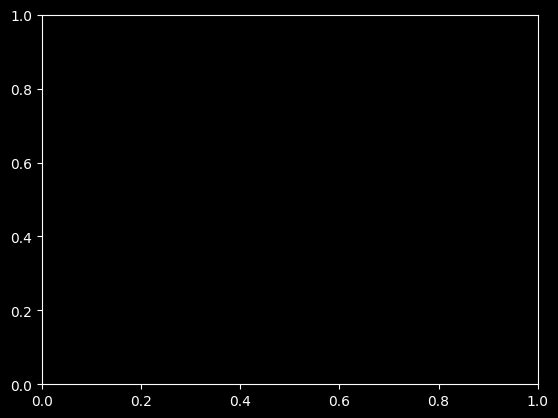

In [180]:
# create plot
plt.plot(top_breeds_grouped.groupby(['boro_name', 'ZipCode'])['Income'].sum())
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.legend('Breed')

plt.tight_layout()
plt.show()